## 02 - Exploratory Data Analysis (EDA)

En esta sección se realiza un análisis exploratorio del conjunto de datos ya limpio, con el objetivo de entender la distribución de las variables, identificar relaciones entre ellas y detectar posibles patrones que puedan influir en el rendimiento académico de los estudiantes.

El EDA nos ayudará a formular hipótesis, seleccionar variables relevantes y tomar decisiones informadas para la fase de modelado.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/clean_dataset_estudiantes.csv")
df

,horas_estudio_semanal,nota_anterior,tasa_asistencia,horas_sueno,edad,nivel_dificultad,tiene_tutor,horario_estudio_preferido,estilo_aprendizaje,nota_final,aprobado
0,8.957476,48.830601,86.640182,6.675694,25,fácil,sí,tarde,lectura/escritura,84.4,1
1,11.042524,80.825707,83.449655,4.616844,18,difícil,no,tarde,desconocido,72.0,1
2,4.510776,90.383694,74.623607,7.755246,25,fácil,no,mañana,lectura/escritura,80.0,1
3,6.647213,81.878257,82.849841,8.592826,23,fácil,no,desconocido,visual,78.2,1
4,1.000000,66.254179,54.539935,6.671840,21,medio,no,desconocido,auditivo,66.0,1
...,...,...,...,...,...,...,...,...,...,...,...
995,12.821334,79.453807,87.058862,5.581576,22,medio,sí,noche,lectura/escritura,78.9,1
996,15.200448,87.246126,90.160085,6.063783,24,medio,sí,mañana,auditivo,73.6,1
997,8.158924,53.324469,61.525951,6.562950,29,fácil,no,noche,lectura/escritura,65.0,1
998,18.582076,88.309605,96.326078,6.691088,21,medio,sí,noche,kinestésico,73.8,1


Empezaremos con el análisis Univariado, primero con las variables numéricas:

In [7]:
num_cols = df.select_dtypes(include = "number").columns
num_cols

Index(['horas_estudio_semanal', 'nota_anterior', 'tasa_asistencia',
       'horas_sueno', 'edad', 'nota_final', 'aprobado'],
      dtype='object')

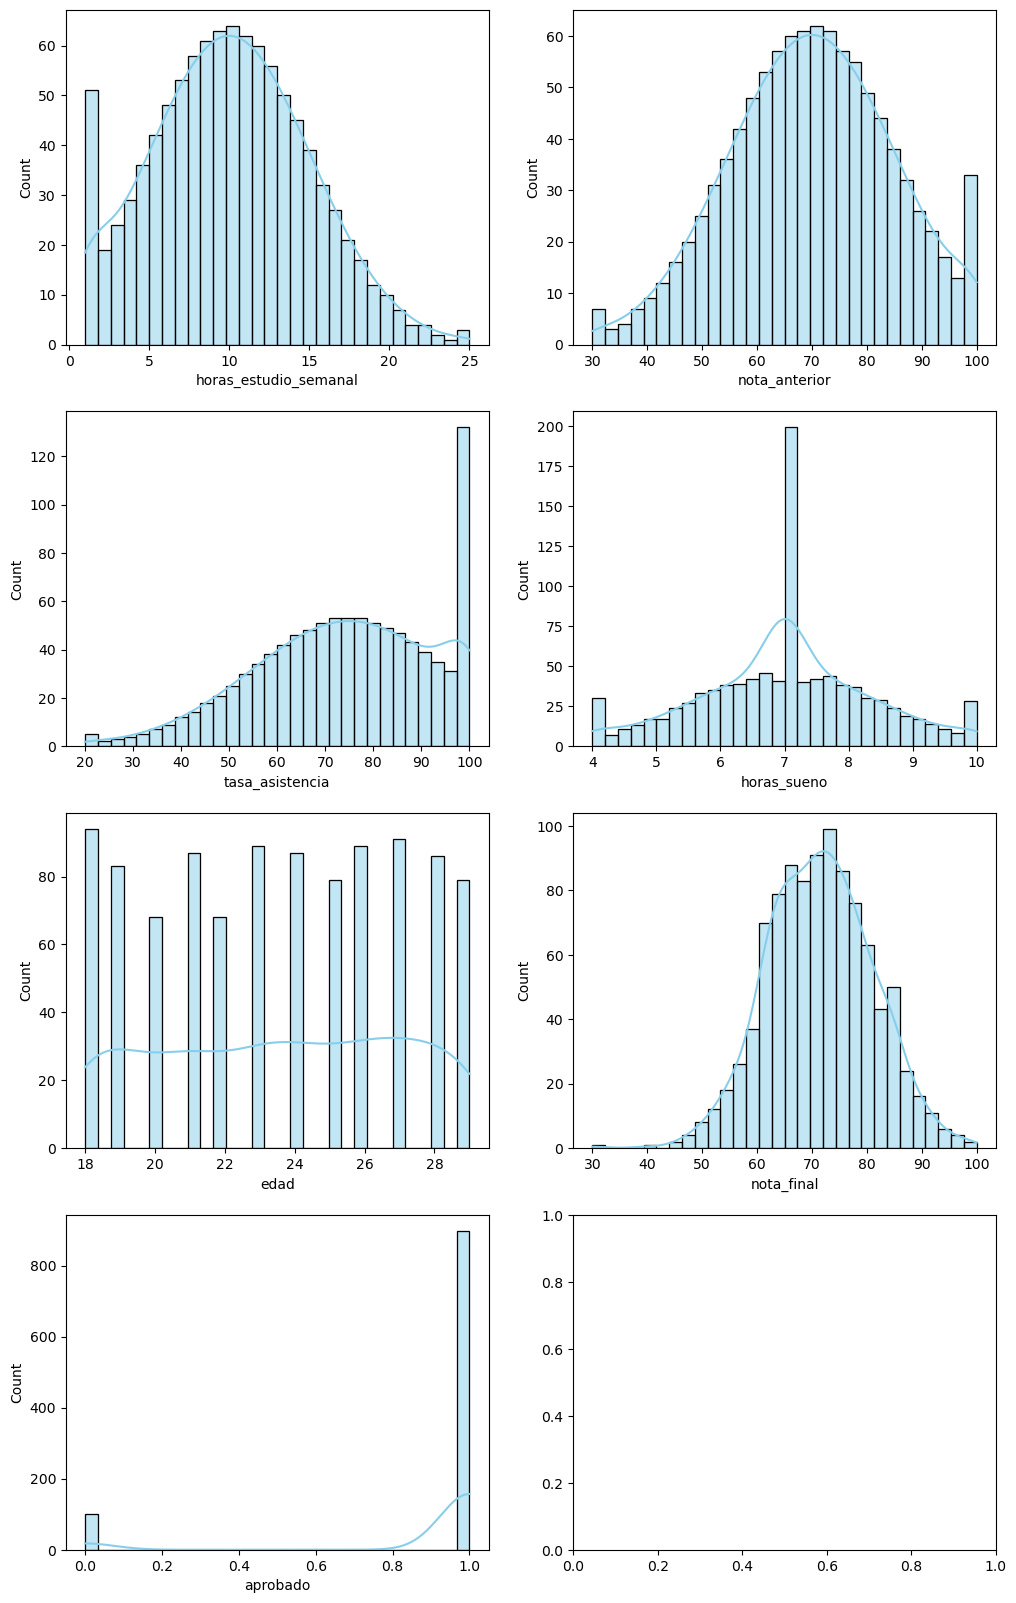

In [31]:
nrows = int(np.ceil(len(num_cols) / 2))

fig, ax = plt.subplots(nrows, 2, figsize=(12, nrows * 5))
ax = ax.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(df[col], kde = True, bins = 30, color="skyblue", ax = ax[i])

plt.show()

**Observaciones:**

- **`horas_estudio_semanal`** muestra una distribución aproximadamente normal con ligera asimetría positiva (más valores hacia la izquierda).
- **`nota_anterior`** y **`tasa_asistencia`** presentan distribución normal con asimetría negativa; en particular, `tasa_asistencia` tiene una concentración notable en el valor máximo (100%).
- **`horas_sueno`** y **`nota_final`** siguen una distribución bastante normal y centrada, sin grandes sesgos.
- **`edad`** tiene una distribución uniforme, con estudiantes repartidos equitativamente entre 18 y 29 años.
- **`aprobado`** (variable objetivo) está desbalanceada: la mayoría de los estudiantes aprueban (valor 1).


Sigamos con las variables categoricas:

In [9]:
cat_cols = df.select_dtypes(include = "O").columns
cat_cols

Index(['nivel_dificultad', 'tiene_tutor', 'horario_estudio_preferido',
       'estilo_aprendizaje'],
      dtype='object')

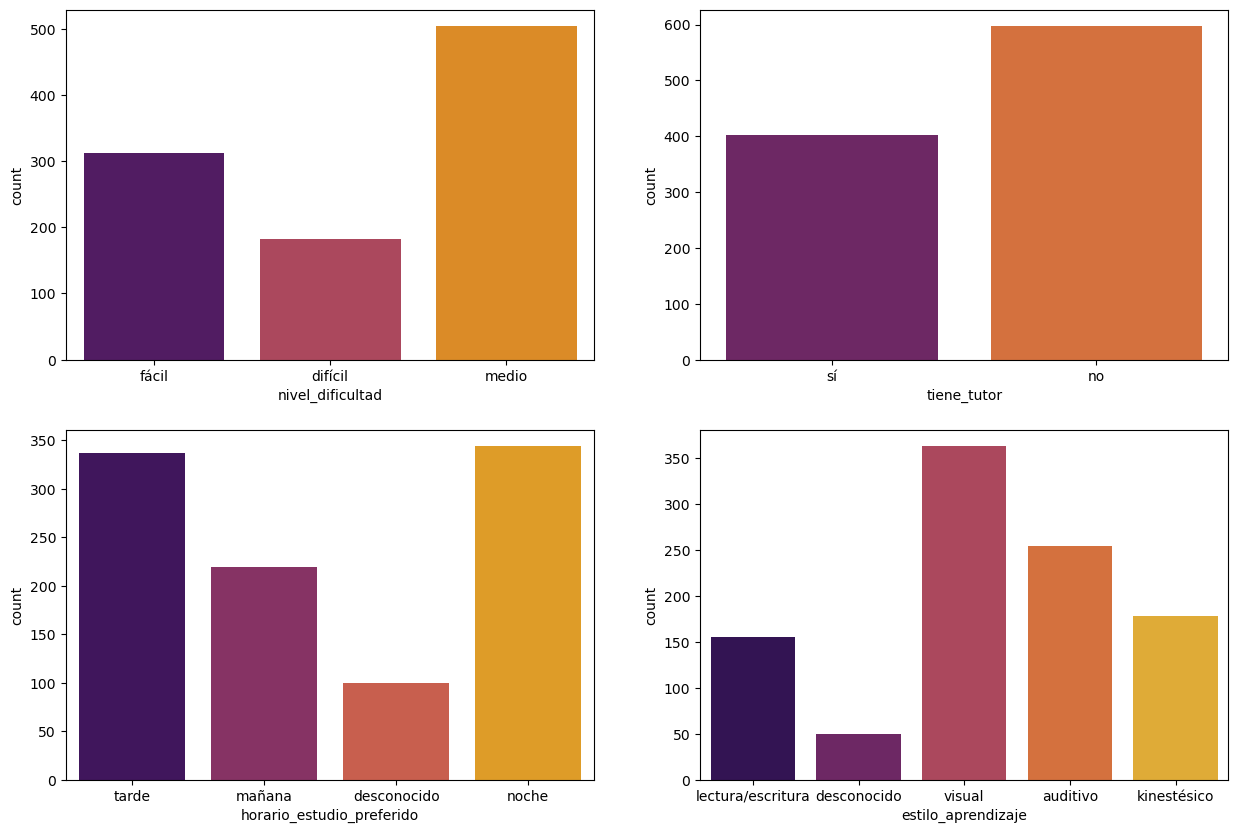

In [29]:
nrows2 = int(np.ceil(len(cat_cols) / 2))

fig, ax = plt.subplots(nrows2, 2, figsize = (15,nrows2 * 5))
ax = ax.flatten()


for i, col in enumerate(cat_cols):
    sns.countplot(data=df, x=col, ax = ax[i], hue = col, palette="inferno")

plt.show()

**Observaciones:**
- `nivel_dificultad`: la mayor parte de las variables son "medio", seguido por fácil y finalmente difícil
- ``tiene_tutor``: La mayor parte de alumnos tiene tutor
- ``hora_estudio_preferida``: La mayor parte está igualda entre tarde o noche, seguida de mañana, también con valores desconocidos
- ``estilo_aprendizaje`` la mayor parte es visual, el resto distribución similar y algunos desconocidos

Vamos ahora con el análisis bivariado:

Empezamos viendo un heatmap de la corelación

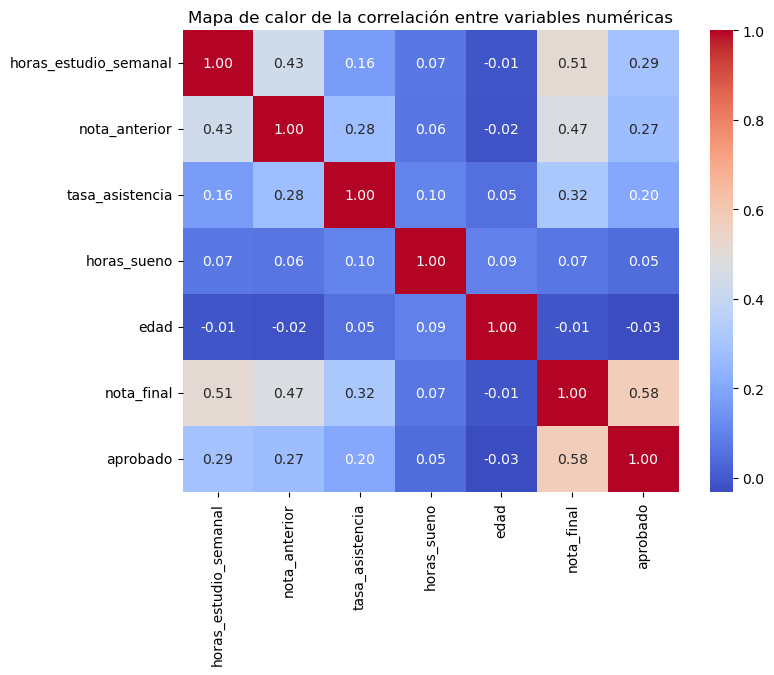

In [41]:
corr = df[num_cols].corr()
plt.figure(figsize = (8, 6))
sns.heatmap(corr, annot = True, cmap = "coolwarm", fmt = ".2f")
plt.title("Mapa de calor de la correlación entre variables numéricas")
plt.show()

**Observaciones:**
- La **nota final** está fuertemente correlacionada con  **horas de estudio semanales** y **nota anterior**, lo que sugiere que el esfuerzo y el rendimiento previo influyen considerablemente.
- Existe una correlación moderada entre **tasa de asistencia** y **nota final**, indicando que la asistencia a clase tiene un impacto positivo, aunque débil.
- **Las horas de sueño** tienen una correlación muy débil con el rendimiento académico, lo que sugiere que no es un factor determinante en este caso.
- **La edad** no muestra una relación significativa con las variables objetivo

Seguimos con análisis de variables categóricas vs variable objetivo nota_final:

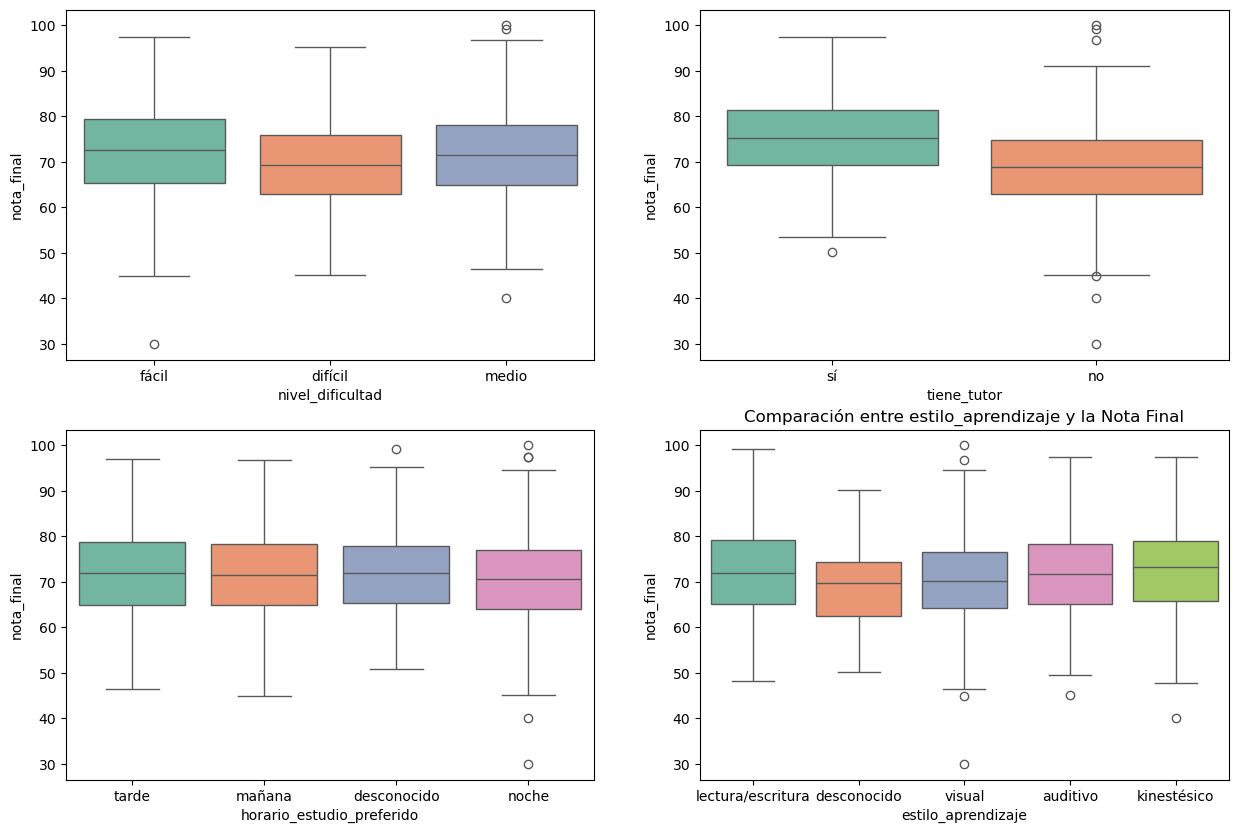

In [46]:
fig, ax = plt.subplots(nrows2, 2, figsize = (15,nrows2 * 5))
ax = ax.flatten()


for i, col in enumerate(cat_cols):
     sns.boxplot(x=col, y="nota_final", hue = col, data=df, palette="Set2", ax = ax[i])
     plt.title(f'Comparación entre {col} y la Nota Final')

plt.show()

**Observaciones:**

- **`nivel_dificultad`**: Aunque no hay una diferencia drástica en las notas finales, los estudiantes que consideran el nivel como "fácil" tienden a obtener mejores calificaciones en comparación con los que consideran el nivel como "difícil".
   
- **`tiene_tutor`**: Los estudiantes que tienen tutor parecen obtener mejores notas finales en general, lo que sugiere que contar con apoyo adicional tiene un impacto positivo en el rendimiento académico.

- **`horarios_estudio_preferido`**: No se observan grandes diferencias entre los horarios de estudio, pero los estudiantes que prefieren estudiar de noche parecen tener una ligera tendencia a obtener notas más bajas en comparación con aquellos que prefieren estudiar durante el día o en horarios más flexibles.

- **`estilo_aprendizaje`**: Los estudiantes que utilizan el método de *lectura/escritura* tienden a obtener notas finales ligeramente más altas, mientras que los estudiantes que prefieren el método visual parecen tener notas finales un poco más bajas.


Vamos ahora  hacer lo mismo con las variables numéricas:

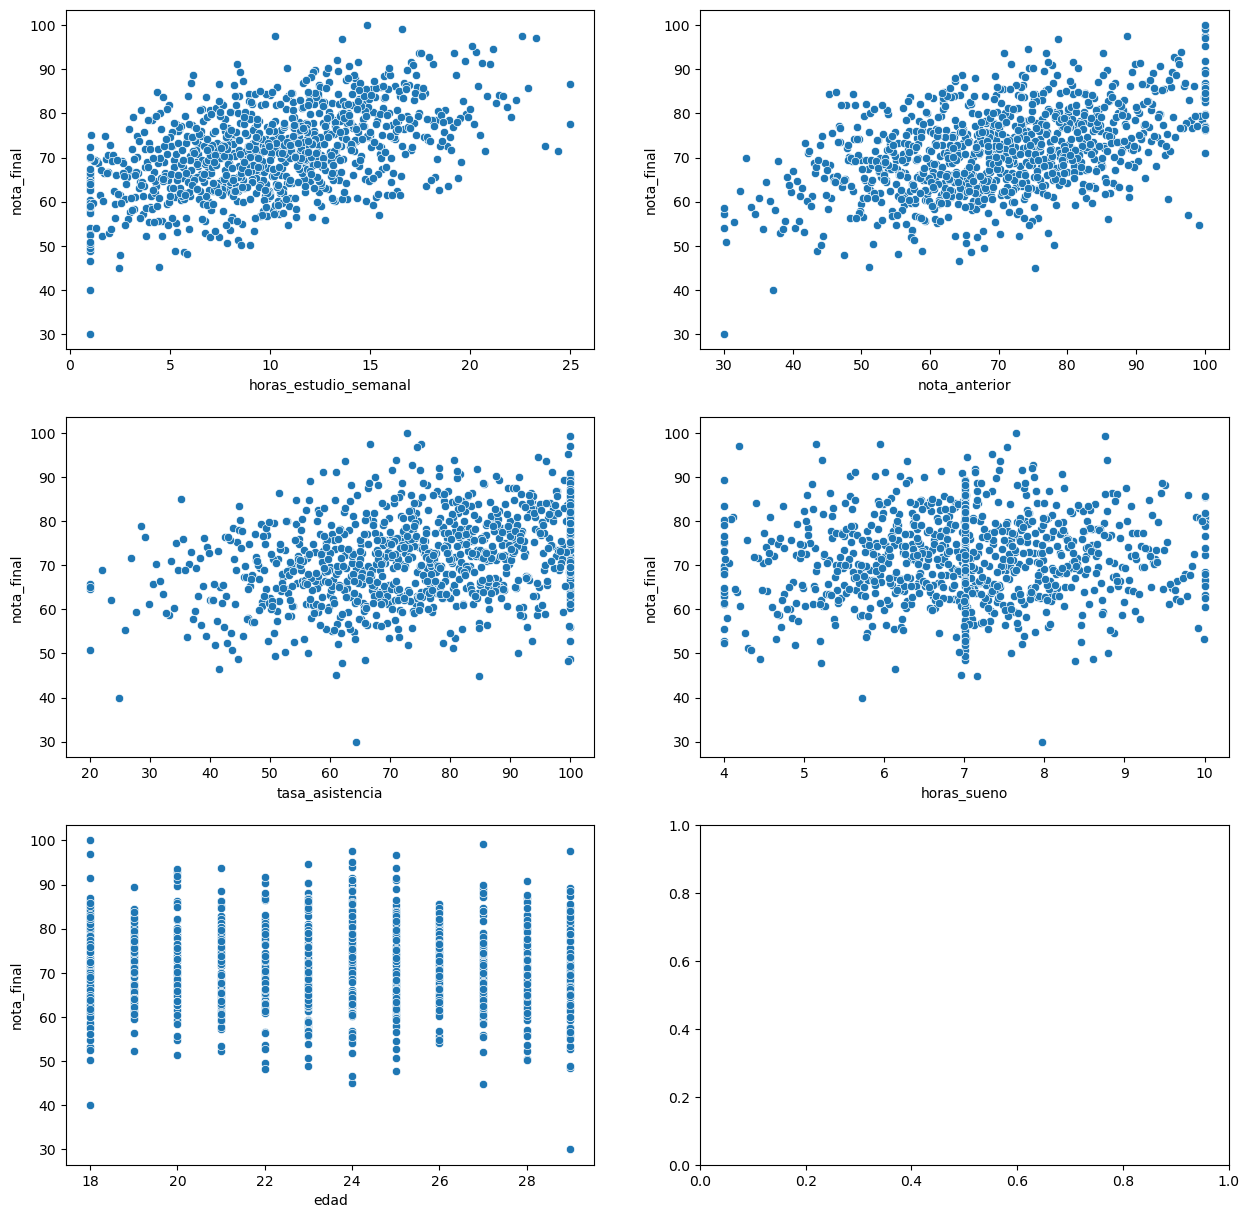

In [53]:
num_cols_ba = [col for col in num_cols if col not in ['nota_final', 'aprobado']]
nrows_ba = int(np.ceil(len(num_cols_ba) / 2))

fig, ax = plt.subplots(nrows_ba, 2, figsize=(15, nrows_ba * 5))
ax = ax.flatten()

for i, col in enumerate(num_cols_ba):
    sns.scatterplot(data=df, x = col, y=df["nota_final"], ax= ax[i])

plt.show()


**Observaciones:**

- Las **horas de estudio** y **nota_anterior** muestran una correlación positiva con la **nota final**.
- La **tasa de asistencia** tiene una correlación positiva con la **nota final**, pero de manera menos notable.
- Las **horas de sueño** no parecen tener una relación significativa con la **nota final**.
- La **edad** tampoco muestra una correlación destacada con la **nota final**.


Probemos también con un pairplot:

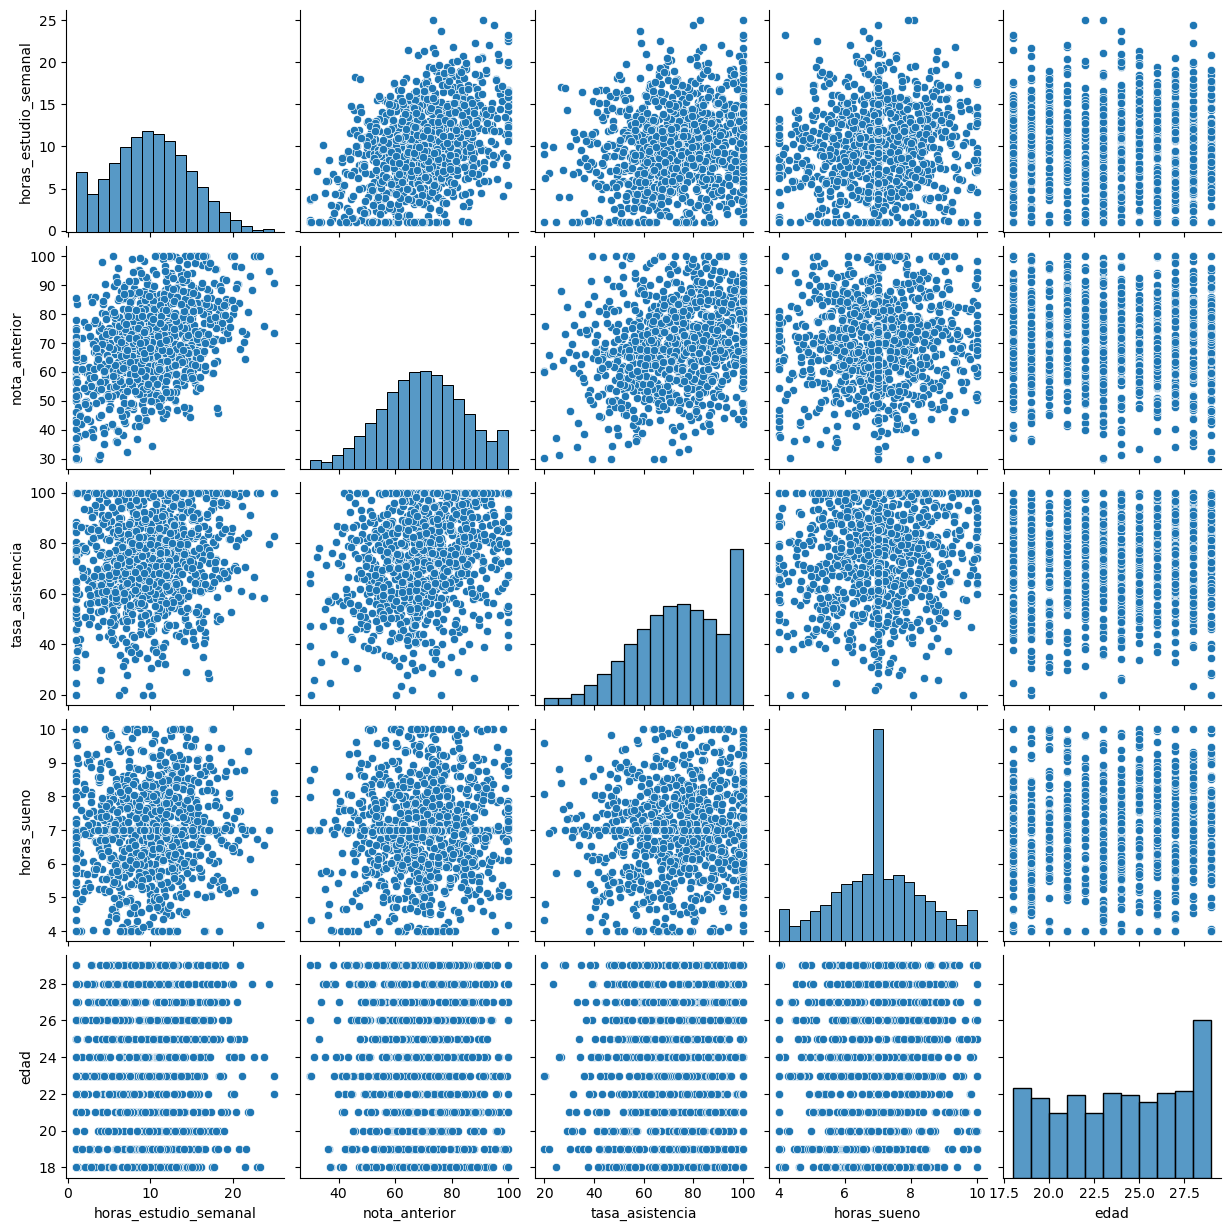

In [55]:
sns.pairplot(df[num_cols_ba])
plt.show()

Podemos observar de nuevo las correlaciones que vimos en el heatmap en forma gráfica, además de las distribuciones

## **Resumen de observaciones final**


### 1. Análisis Univariado
- **Variables numéricas**: Se analizaron mediante histogramas y gráficos de densidad.
  - La mayoría siguen una distribución aproximadamente normal.
  - `nota_anterior` y `tasa_asistencia` presentan asimetría negativa.
  - `horas_estudio_semanal` muestra una ligera asimetría positiva.
  - `edad` está uniformemente distribuida.
- **Variables categóricas**: Se utilizaron countplots para analizar su distribución.
  - Algunas categorías están desbalanceadas, pero no requieren agrupamiento inmediato.

### 2. Análisis Bivariado
- **Correlaciones**:
  - `nota_final` tiene alta correlación con `horas_estudio_semanal` (0.51) y `nota_anterior` (0.47).
  - `tasa_asistencia` muestra una correlación moderada con `nota_final` (0.31).
  - `horas_sueño` y `edad` no parecen tener relación con el rendimiento académico.
- **Comparación de variables categóricas con `nota_final`**:
  - Los alumnos con tutor y los que indican nivel de dificultad "fácil" tienden a obtener mejores notas.
  - No hay grandes diferencias entre estilos de aprendizaje ni horarios preferidos.


Con esto, ya podemos finalizar el EDA y pasar al preprocesamiento, para dejar los datos listos para crear nuestros modelos de Machine Learning